 Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/21f22d18c15db96f2a6ce96fdf640ced045b79a0fcb2ceacf61668e3.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Torrance, California, United States**, and the stations the data comes from are shown on the map below.


In [5]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
%matplotlib.inline

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'21f22d18c15db96f2a6ce96fdf640ced045b79a0fcb2ceacf61668e3')

ImportError: No module named mplleaflet

In [6]:
#importing the data
df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/21f22d18c15db96f2a6ce96fdf640ced045b79a0fcb2ceacf61668e3.csv').sort(['ID','Date'])
#df.head()

NameError: name 'pd' is not defined

In [2]:
#convert the date column from string to date_time format 
df['Date'] = pd.to_datetime(df['Date'])
#extracting the month 
df['Month']=df['Date'].map(lambda x:x.month)
#extracting the day 
df['Day']=df['Date'].map(lambda x:x.day)

df=df.set_index(['Month','Day'])
#tenth value of temperature is given, hence divide the temperature value by 10 to get original temperature
df['Data_Value']*=0.1
#extracting the year 
df['Year']=df['Date'].apply(lambda x:x.year)

NameError: name 'pd' is not defined

In [6]:
#removing all the values that are in a leap year 
remove_leap = df.loc[2,29] 
df = df[~df.index.isin(remove_leap.index)]

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


In [7]:
df_2015=df[df['Year']==2015]

In [23]:
df=df[df['Year']!=2015]

In [26]:
#create separate data frame for maximum temperature
maximum_temp=df[df['Element']=='TMAX']
temp_max=maximum_temp.groupby(level=['Month','Day'])['Data_Value'].max()
#separate data frame for minimum temperature 
minimum_temp=df[df['Element']=='TMIN']
temp_min=minimum_temp.groupby(level=['Month','Day'])['Data_Value'].min()

In [31]:
#Dataframe for year 2015
maximum_temp_2015=df_2015[df_2015['Element']=='TMAX']
maximum_2015=maximum_temp_2015.groupby(level=['Month','Day'])['Data_Value'].max()
minimum_temp_2015=df_2015[df_2015['Element']=='TMIN']
minimum_2015=minimum_temp_2015.groupby(level=['Month','Day'])['Data_Value'].min()


In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker



In [1]:
date=df_2015['Date'].unique()

NameError: name 'df_2015' is not defined

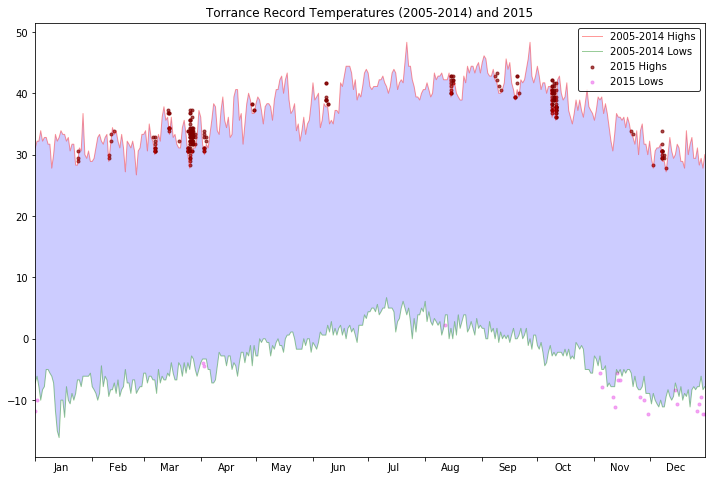

In [111]:
#object oriented method for plotting
fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (12,8) ) 
ax.set_title('Torrance Record Temperatures (2005-2014) and 2015')

#2014-2015 plots for maximum and minimum temperature 
plt.plot(date, temp_max.values, 'red', linewidth = 1, alpha=0.4, label = '2005-2014 Highs')
plt.plot(date, temp_min.values, 'green', linewidth = 1, alpha=0.4, label = '2005-2014 Lows') 
#shading the data in between 
plt.fill_between(date, temp_max, temp_min, facecolor='blue',alpha=0.2)
#ax.legend(loc = 1).get_frame().set_edgecolor('white') 

label_max = "2015 Highs"
label_min = "2015 Lows"
#placing the legend in the right corner
ax.legend(loc = 1).get_frame().set_edgecolor('Black') 
#comparing the values which reached maximum or minimum in the year 2015

for idx, rows in maximum_temp_2015.iterrows():
    if (rows['Data_Value'] > temp_max.loc[idx]):
        plt.scatter(rows['Date'], rows['Data_Value'], c = 'maroon', marker = '.',alpha=0.7, label =label_max)
        label_max = "_nolegend_" # To avoid duplicate labels in the legend
for idx, rows in minimum_temp_2015.iterrows():
    if (rows['Data_Value'] < temp_min.loc[idx]):
        plt.scatter(rows['Date'], rows['Data_Value'], c = 'violet', marker = '.',alpha=0.7, label =label_min)
        label_min = "_nolegend_"
ax.legend(loc = 1).get_frame().set_edgecolor('Black')

#labelling for X-axis 

xmin, xmax = date[0], date[-1]
ax.set_xlim(xmin, xmax)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
xticks = ax.xaxis.get_minor_ticks()
for xtick in xticks:
    xtick.tick1line.set_markersize(0)
    xtick.tick2line.set_markersize(0)
    xtick.label1.set_horizontalalignment('center')


plt.show()
fig.tight_layout()

fig.savefig('Temperatures.png', bbox_inches='tight')